<a href="https://www.kaggle.com/code/rizkynindra/pneumonia-detection-using-cnn?scriptVersionId=147407622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Dropout, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
def load_images(image_path):
    files = np.array(os.listdir(image_path))
    
    images = []
    for image in tqdm(files):
        # Read image
        image = cv2.imread(image_path + image)
        # Resize image to 200x200 px
        image = cv2.resize(image, (200,200), interpolation=cv2.INTER_AREA)
        images.append(image)
        
    images = np.array(images)
    
    return images

In [3]:
normal_train = load_images('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/')
pneu_train = load_images('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/')
normal_test = load_images('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/')
pneu_test = load_images('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/')

100%|██████████| 390/390 [00:07<00:00, 53.63it/s]


In [4]:
print('Normal Train Shape\t:', normal_train.shape)
print('Pneumonia Train Shape\t:', pneu_train.shape)
print('Normal Test Shape\t:', normal_test.shape)
print('Pneumonia Test Shape\t', pneu_test.shape)

Normal Train Shape	: (1341, 200, 200, 3)
Pneumonia Train Shape	: (3875, 200, 200, 3)
Normal Test Shape	: (234, 200, 200, 3)
Pneumonia Test Shape	 (390, 200, 200, 3)


X-ray orang normal


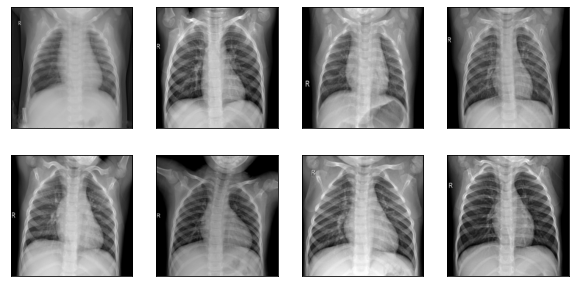

In [5]:
print('X-ray orang normal')
fig, axes = plt.subplots(ncols=4, nrows=2, sharex=False,
                         sharey=True, figsize=(10, 5))

index = 10
for i in range(2):
  for j in range(4):
    axes[i,j].imshow(normal_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

X-ray orang yang kena pneumonia


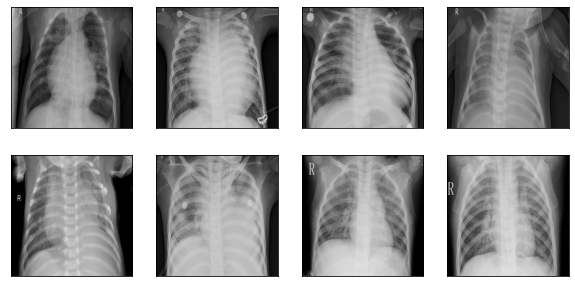

In [6]:
print('X-ray orang yang kena pneumonia')
fig, axes = plt.subplots(ncols=4, nrows=2, sharex=False,
                         sharey=True, figsize=(10, 5))

index = 100
for i in range(2):
  for j in range(4):
    axes[i,j].imshow(pneu_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

In [7]:
X_train = np.vstack((normal_train, pneu_train))
X_test = np.vstack((normal_test, pneu_test))

print('X_train.shape\t:', X_train.shape)
print('X_test.shape\t:', X_test.shape)

X_train.shape	: (5216, 200, 200, 3)
X_test.shape	: (624, 200, 200, 3)


In [8]:
y_train = np.append([0] * normal_train.shape[0], [1] * pneu_train.shape[0])
y_test = np.append([0] * normal_test.shape[0], [1] * pneu_test.shape[0])

print('y_train.shape\t:', y_train.shape)
print('y_test.shape\t:', y_test.shape)

y_train.shape	: (5216,)
y_test.shape	: (624,)


In [9]:
train = np.array(list(zip(X_train, y_train)))
test = np.array(list(zip(X_test, y_test)))

#shuffle
np.random.shuffle(train)
np.random.shuffle(test)

# X & Y train dipisah
X_train, y_train = zip(*train)
X_train = np.array(X_train)
y_train = np.array(y_train)

# X & Y test dipisah
X_test, y_test = zip(*test)
X_test = np.array(X_test)
y_test = np.array(y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [10]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

In [11]:
datagen.fit(X_train)

In [12]:
input1 = Input(shape=(200, 200, 3))

In [13]:
cnn = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(input1)
cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)
cnn = Flatten()(cnn)

In [14]:
cnn = Dropout(0.5)(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(1, activation='sigmoid')(cnn)

In [15]:
model = Model(inputs=input1, outputs=output1)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dropout (Dropout)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               320001

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_acc', mode='max', 
                             verbose=1, save_best_only=True, save_freq=1)

In [19]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                              epochs=30, shuffle=True,
                              validation_data=(X_test, y_test),
                              callbacks=[checkpoint])

Epoch 1/30
163/163 [==============================] - 52s 257ms/step - loss: 39.4174 - acc: 0.7874 - val_loss: 0.9321 - val_acc: 0.7596
Epoch 2/30
163/163 [==============================] - 43s 264ms/step - loss: 0.3862 - acc: 0.8470 - val_loss: 0.9396 - val_acc: 0.7740
Epoch 3/30
163/163 [==============================] - 42s 256ms/step - loss: 0.3484 - acc: 0.8633 - val_loss: 0.9904 - val_acc: 0.7372
Epoch 4/30
163/163 [==============================] - 41s 254ms/step - loss: 0.3072 - acc: 0.8677 - val_loss: 1.0450 - val_acc: 0.7356
Epoch 5/30
163/163 [==============================] - 42s 256ms/step - loss: 0.3143 - acc: 0.8612 - val_loss: 1.1022 - val_acc: 0.6955
Epoch 6/30
163/163 [==============================] - 42s 256ms/step - loss: 0.3150 - acc: 0.8675 - val_loss: 0.9310 - val_acc: 0.7324
Epoch 7/30
163/163 [==============================] - 42s 256ms/step - loss: 0.3087 - acc: 0.8658 - val_loss: 1.3212 - val_acc: 0.6955
Epoch 8/30
163/163 [==============================] - 

In [20]:
model.save('/kaggle/working/') 

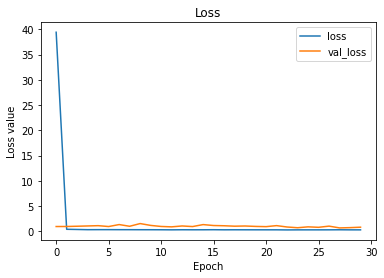

In [21]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

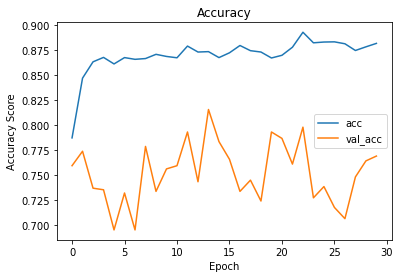

In [22]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

In [23]:
model = load_model('/kaggle/working/')

In [24]:
def create_confusion_matrix(image_to_predict, actual_labels):
  test_predictions = np.round(model.predict(image_to_predict))

  cm = confusion_matrix(actual_labels, test_predictions)

  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt='d',
              cmap=plt.cm.Blues, cbar=False, annot_kws={'size':14})
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

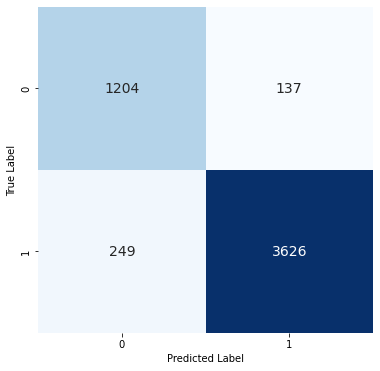

In [25]:
create_confusion_matrix(X_train, y_train)

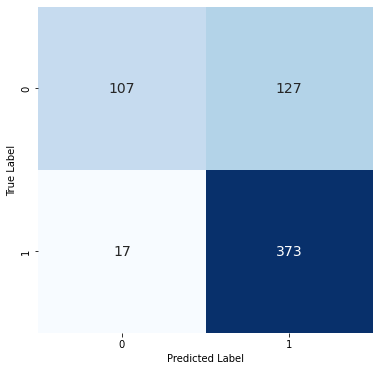

In [26]:
create_confusion_matrix(X_test, y_test)

In [27]:
manual_test_normal = load_images('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/')
manual_test_pneu = load_images('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/')

100%|██████████| 8/8 [00:00<00:00, 45.70it/s]


In [28]:
manual_pred_normal = np.round(model.predict(manual_test_normal))
manual_pred_pneu = np.round(model.predict(manual_test_pneu))

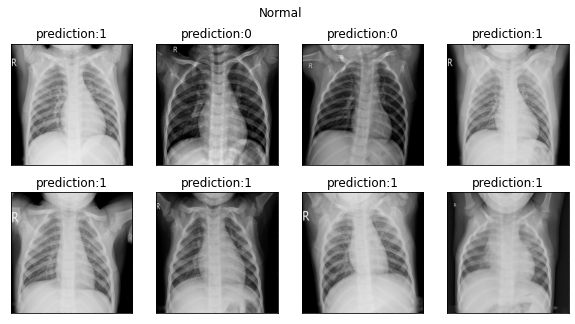

In [29]:
fig, axes = plt.subplots(ncols=4, nrows=2, sharex=False, sharey=True, figsize=(10, 5))

plt.suptitle('Normal')
index = 0
for i in range(2):
  for j in range(4):
    axes[i,j].set_title('prediction:' + str(int(manual_pred_normal[index][0])))
    axes[i,j].imshow(manual_test_normal[index], cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

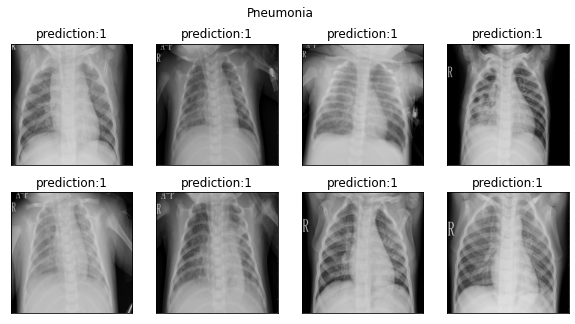

In [30]:
fig, axes = plt.subplots(ncols=4, nrows=2, sharex=False, sharey=True, figsize=(10, 5))

plt.suptitle('Pneumonia')
index = 0
for i in range(2):
  for j in range(4):
    axes[i,j].set_title('prediction:' + str(int(manual_pred_pneu[index][0])))
    axes[i,j].imshow(manual_test_pneu[index], cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()